In [ ]:
# if you need to use UMAP uncomment:
# !pip install umap-learn
!pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808331 sha256=536e47de17d09cc499ca0f4ba9ab875d79428911d18726538759cba3ac7c6572
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### STRUCTURE FOR THE CLUSTERING MODEL

1. EDA: data exploration and visualisation. To see what we have and what we can do about it. Explore data types, outliers (boxplot or use log), missings. Visualize them.
2. Feature Engineering. We have to make features to be acceptable for model. Normalization between [0; 1]
3. Model test, evalusation
4. Model run, prediction
5. Tuning

When stuck on what to do next always go back to the description here.<br>

Preparing variables for K-means clustering involves several important steps to ensure that the clustering process is effective and meaningful. Here are the key steps to prepare your variables for K-means:

### Preparing Data
#### 1. Data Collection and Cleaning:

Gather your dataset, ensuring that it is complete and free of errors.<br>
Handle any missing values in your dataset using techniques like imputation or removal of incomplete records.<br>

#### 2. Feature Selection:

Carefully select the features (variables) that are relevant to your clustering task. Including irrelevant features can negatively impact the results.<br>

#### 3. Normalization/Standardization:

Normalize or standardize your data to ensure that all features have similar scales. This is particularly important because K-means relies on distance measures, and differences in feature scales can bias the clustering.<br>
Common methods include z-score standardization (subtracting the mean and dividing by the standard deviation) or min-max scaling (scaling features to a specific range, e.g., [0, 1] or [-1, 1]).<br>

#### 4. Outlier Detection and Handling:

Identify and address outliers in your dataset, as they can significantly affect K-means clustering results. You can remove, transform, or down-weight outliers based on the nature of your data and domain knowledge.<br>
Sometimes it is difficult to decide on if the points should be treated as outliers. Some rules to follow:
- if it is less than 1% of cases -- deletion. could be a good option
- if it is ~10% -- it is more likely some type of behavior OR a fraud. If in doubt, try to consult with client on strange behavior, they may have a clue on if it is a standard one.

#### 5. Feature Engineering:

Consider creating new features or transformations of existing features that may enhance the clustering process. Feature engineering can help capture underlying patterns in the data.<br>
Check any collinearity between the variables. If there is any, consider removing variables or transforming them.<br>
Try to understand the meaning of the variable to prepare new ones. For example, it could be usefult to make a variable `add_to_cart_per_view` from total `add_to_cart` and total `view_item` events.

#### 6. Dimensionality Reduction:

If you have a high-dimensional dataset, consider applying dimensionality reduction techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the number of features while retaining the most important information.<br>
Another good embedding tool is LightFM library working on the simple Neural Network (you can find example in this Notebook).<br>
Embeddings also could be goot tool to search for underlying patterns and they will eliminate multicollinearity.<br>

#### 7. Encoding Categorical Variables:

If your dataset contains categorical variables, you need to encode them into numerical values. Common methods include one-hot encoding or label encoding, depending on the nature of the categorical data.

### Understanding K-means output
After the data is prepared, we can run K-means.<br>
However, to do so, we need to choose amount of clusters to run.<br>
To do that several steps are required.

### THE NUMBERS

#### 1. Selection of Distance Metric:

Choose an appropriate distance metric based on the nature of your data. Euclidean distance is the default and widely used, but other metrics like Manhattan distance, cosine similarity, or custom distance functions may be more suitable for specific data types.

#### 2.Determining the Number of Clusters (K):

Decide on the number of clusters you want to identify. You can use methods like the elbow method, silhouette score, or domain knowledge to help determine the optimal K value.
Initializations:

#### 3. Choose an initialization method for the cluster centroids.
K-means++ is a common choice as it tends to lead to better convergence. You can also experiment with random initialization.
Convergence Criteria:

#### 4. Set a stopping criterion to determine when the algorithm has converged.
Common criteria include a maximum number of iterations or when the centroids no longer change significantly.
Data Visualization:

#### 5. Metrics.
Use metrics such as `calinski_harabasz score` or `davies_bouldin score` to decide on what amount of clusters would work the best.<br>
The higher calinski_harabasz the better, the lower davies_bouldin the better.

### THE VISUALIZATION

#### 1. Construct the plot
Plotting will give you a sence on if the chosen amount of data is actually meaningful in the dimentions chosen.
Statistics are calculated on distances and can not 100% determine the best clusters number option, so you have to see the possible solutions on the plot. Compare several outputs.

### THE INTERPRETATION

#### 1. Use clusters to see the data
Add clusters to the data and run research to see the difference between the clusters. Do they differ from each other? Could it be explained? Is there meaning behind the clusters? Do you consider the need in other variables to explain it better?
The interpretation is the final part where you decide if the chosen clusters are good enough and if you need more data to re-run the algorithm.

### NOTE

Before running K-means, consider visualizing your data using scatter plots, PCA plots, or other techniques to gain insights into the data structure.
Data Splitting:

Consider splitting your data into a training set for clustering and a separate test set for evaluating the results. This helps avoid overfitting and ensures that your clustering model generalizes well to new data.

In [ ]:
# Needed libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Depending on the data source, we have to upload data accordingly
If there is need to use bigquery to load data to VertexAI here is an example

In [ ]:
# # This is an example to load data from BigQuery

# %%bigquery df
# SELECT event_date, user_pseudo_id, user_id, device.category as device_type,
#     device.mobile_brand_name as device_brand,
#     device.mobile_model_name as device_model,
#     device.mobile_marketing_name as device_name,
#     device.operating_system as device_os,
#     device.operating_system_version as device_os_version,
#     h.key as key,
#     h.value.string_value as client_id,
# FROM `vertex-ai-sandbox-380023.analytics_250000498.events_20230327`
# left join unnest(user_properties) as h
# where key = "client_id"


#### For test sake we are uploading csv

In [ ]:
# COPY the path from the google drive tree (the folder icon on the left panel) and PASTE it here

df = pd.read_csv("/content/drive/MyDrive/KoreanAir/test_data.csv", low_memory=False)
df

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223                   259                 14   
1       1537784667.1656573431                   195                192   
2       1776011315.1676056353                   181                  0   
3       1818135141.1628399971                   162                134   
4       1867856195.1673210502                   127                  6   
...                       ...                   ...                ...   
329932   596225549.1684702634                     0                  0   
329933   571903515.1626167050                     0                  1   
329934   925742109.1682073332                     0                  1   
329935   947966557.1688685007                     0                  1   
329936  1828041751.1599371573                     0                  1   

        add_to_cart_count  view_item_count  listing_engagement_count  \
0                       0                0                         0   
1                       0              830                       806   
2                       0                2                         0   
3                       0             1228                      2292   
4                       1              152                        76   
...                   ...              ...                       ...   
329932                  0               29                       360   
329933                  0               29                       432   
329934                  0               29                       876   
329935                  0               29                       319   
329936                  0               29                       465   

        engagement_weekdays  engagement_weekends  
0                         2                    1  
1                        42                   16  
2                         1                    1  
3                        71                   33  
4                        21                    2  
...                     ...                  ...  
329932                    1                    1  
329933                    3                    3  
329934                    7                    2  
329935                    2                    2  
329936                    9                    1  

[329937 rows x 8 columns]

In [ ]:
# here should be block for data exploration with numbers
df.describe()

enquiry_submit_count  agent_phone_count  add_to_cart_count  \
count         329937.000000      329937.000000      329937.000000   
mean               0.102113           2.097128           0.558097   
std                1.180079          15.432566           7.081821   
min                0.000000           0.000000           0.000000   
25%                0.000000           0.000000           0.000000   
50%                0.000000           0.000000           0.000000   
75%                0.000000           1.000000           0.000000   
max              259.000000        6085.000000         953.000000   

       view_item_count  listing_engagement_count  engagement_weekdays  \
count    329937.000000             329937.000000        329937.000000   
mean         20.734446                348.078330             5.026205   
std          63.189342               1155.536513             9.666862   
min           0.000000                  0.000000             1.000000   
25%           1.000000                 25.000000             1.000000   
50%           5.000000                 83.000000             2.000000   
75%          17.000000                256.000000             5.000000   
max        3545.000000              85473.000000           130.000000   

       engagement_weekends  
count        329937.000000  
mean              2.149162  
std               2.830308  
min               1.000000  
25%               1.000000  
50%               1.000000  
75%               2.000000  
max              51.000000

In [ ]:
df.isna().sum()

user_pseudo_id              0
enquiry_submit_count        0
agent_phone_count           0
add_to_cart_count           0
view_item_count             0
listing_engagement_count    0
engagement_weekdays         0
engagement_weekends         0
dtype: int64

In [ ]:
df.shape

(329937, 8)

In [ ]:
df.iloc[167034, :]

user_pseudo_id              1857870442.1681287019
enquiry_submit_count                            0
agent_phone_count                               0
add_to_cart_count                               0
view_item_count                                 2
listing_engagement_count                       23
engagement_weekdays                             1
engagement_weekends                             1
Name: 167034, dtype: object

In [ ]:
# let's also check the data types
df.dtypes

# user_pseudo_id is an onjects and we are fine with it. We have no categorical variables

user_pseudo_id              object
enquiry_submit_count         int64
agent_phone_count            int64
add_to_cart_count            int64
view_item_count              int64
listing_engagement_count     int64
engagement_weekdays          int64
engagement_weekends          int64
dtype: object

In [ ]:
# Let's check if there are any missing values

df.isna().sum()

# we see no missings for the test data

user_pseudo_id              0
enquiry_submit_count        0
agent_phone_count           0
add_to_cart_count           0
view_item_count             0
listing_engagement_count    0
engagement_weekdays         0
engagement_weekends         0
dtype: int64

In [ ]:
df

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223                   259                 14   
1       1537784667.1656573431                   195                192   
2       1776011315.1676056353                   181                  0   
3       1818135141.1628399971                   162                134   
4       1867856195.1673210502                   127                  6   
...                       ...                   ...                ...   
329932   596225549.1684702634                     0                  0   
329933   571903515.1626167050                     0                  1   
329934   925742109.1682073332                     0                  1   
329935   947966557.1688685007                     0                  1   
329936  1828041751.1599371573                     0                  1   

        add_to_cart_count  view_item_count  listing_engagement_count  \
0                       0                0                         0   
1                       0              830                       806   
2                       0                2                         0   
3                       0             1228                      2292   
4                       1              152                        76   
...                   ...              ...                       ...   
329932                  0               29                       360   
329933                  0               29                       432   
329934                  0               29                       876   
329935                  0               29                       319   
329936                  0               29                       465   

        engagement_weekdays  engagement_weekends  days_active  
0                         2                    1            3  
1                        42                   16           58  
2                         1                    1            2  
3                        71                   33          104  
4                        21                    2           23  
...                     ...                  ...          ...  
329932                    1                    1            2  
329933                    3                    3            6  
329934                    7                    2            9  
329935                    2                    2            4  
329936                    9                    1           10  

[329937 rows x 9 columns]

Question2)

checking the data distribution and histograms tends to be a step in testing for normality?<br>
`we are researching the data trying to understand if we can use it further or if it requires cleaning and transformation`<br>
the role of weights is to correct the distribution? and It seems that weights are not applied in the code.<br>
`the weights parameter in the plt.hist is needed to show the histogram in % and not in numbers. We are not adding anything new to the data and not changing it, it is just a way to plot it in more understandable way`<br>
`I will add the comparison to the code`<br>
could you share the clip function again?<br>
`sure, it would be df["column"].clip(upper='your number here', lower='your number here')`

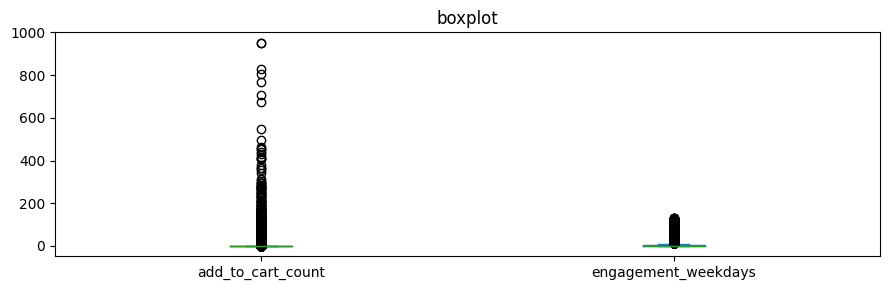

In [ ]:
# Let's see if there are any outliers

# Set the figure size
plt.rcParams["figure.figsize"] = [9, 3]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[["add_to_cart_count", "engagement_weekdays"]].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

<Axes: xlabel='agent_phone_count'>

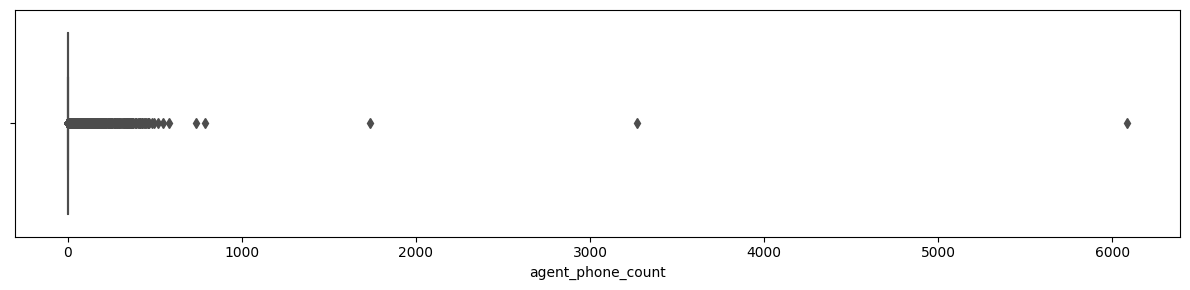

In [ ]:
plt.rcParams["figure.figsize"] = [12, 3]
sns.boxplot(x=df["agent_phone_count"], palette="flare")

<Axes: xlabel='enquiry_submit_count'>

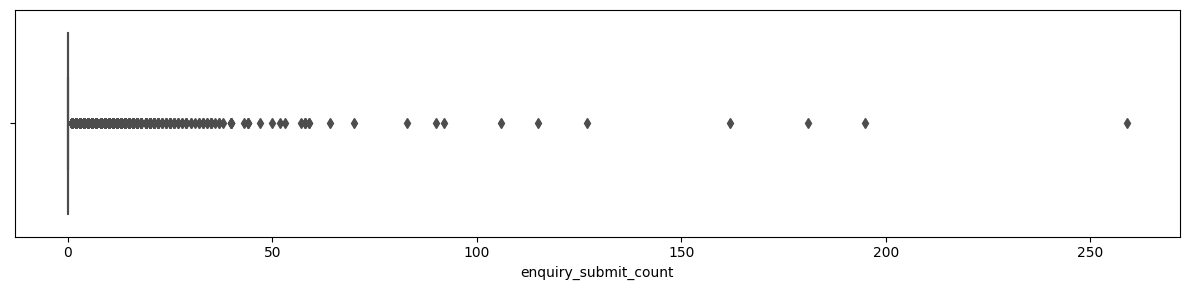

In [ ]:
sns.boxplot(x=df["enquiry_submit_count"], palette="flare")

<Axes: xlabel='add_to_cart_count'>

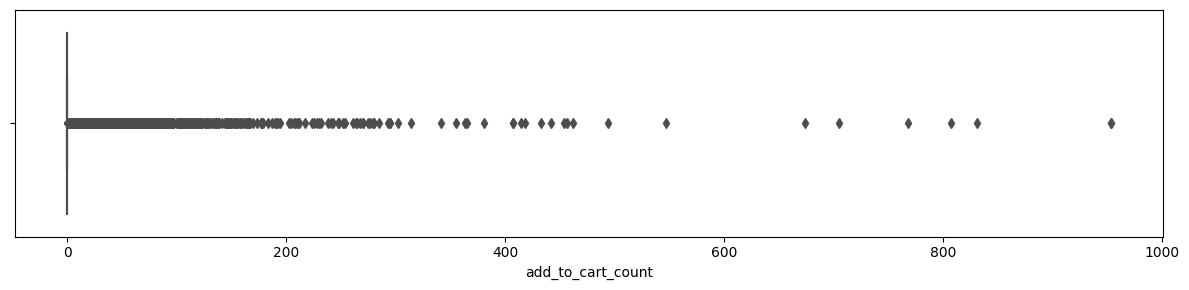

In [ ]:
sns.boxplot(x=df["add_to_cart_count"], palette="flare")

<Axes: xlabel='view_item_count'>

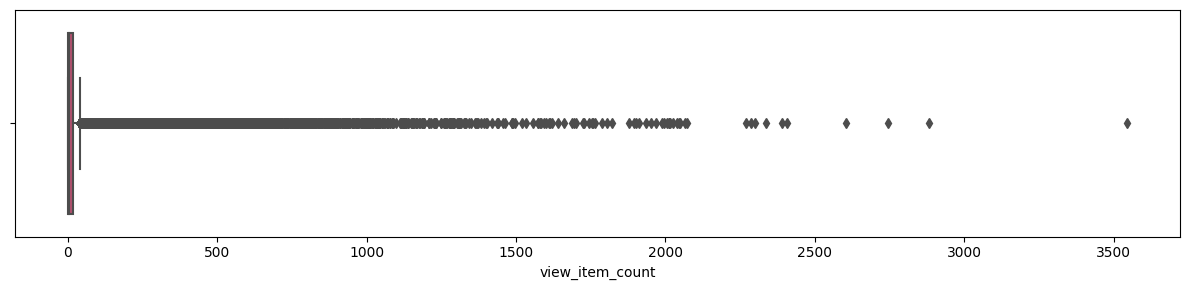

In [ ]:
sns.boxplot(x=df["view_item_count"], palette="flare")
# we can see that time to time there are several outliers possible

<Axes: xlabel='engagement_weekdays'>

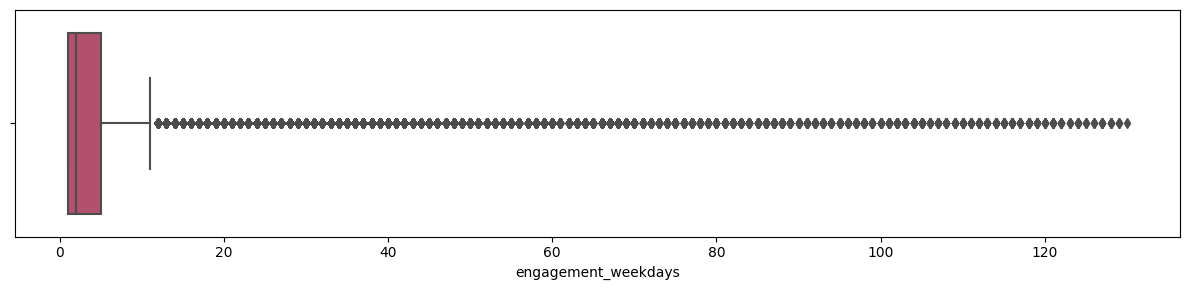

In [ ]:
sns.boxplot(x=df["engagement_weekdays"], palette="flare")

In [ ]:
# let's see strange objects in data
df[df["view_item_count"] > 2500]

# 418 times of add_to_cart looks very strange. Let's see how many of this cart activity are top ones

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
187    1359815062.1659993411                    15                341   
5790    718185510.1652765579                     1                 29   
29614   225223025.1672046869                     0                200   
53687  2034189266.1654080688                     0                283   

       add_to_cart_count  view_item_count  listing_engagement_count  \
187                  418             3545                     26248   
5790                   0             2744                     51675   
29614                  0             2881                     57782   
53687                  0             2605                     36410   

       engagement_weekdays  engagement_weekends  
187                    118                   20  
5790                   122                   45  
29614                  119                   47  
53687                  120                   45

In [ ]:
df.sort_values(by="add_to_cart_count", ascending=False)
# we do have a lot of them actually. Let's see quartiles

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
157      915538543.1594638616                    16                 69   
1567    1890411528.1652959747                     4                 39   
8388    1591721189.1607754005                     1                 11   
7436    1694369330.1506751557                     1                 97   
47      1136088485.1674223024                    30                 24   
...                       ...                   ...                ...   
115455  1653758898.1682294369                     0                  0   
115454   598411619.1684443210                     0                  0   
115453  1269388940.1675368312                     0                  0   
115452  1846001588.1681513979                     0                  0   
329936  1828041751.1599371573                     0                  1   

        add_to_cart_count  view_item_count  listing_engagement_count  \
157                   953              711                      3750   
1567                  953              139                      1026   
8388                  831              132                      9905   
7436                  807               71                      3428   
47                    768              893                     15731   
...                   ...              ...                       ...   
115455                  0                0                        75   
115454                  0                0                        28   
115453                  0                0                         3   
115452                  0                0                         7   
329936                  0               29                       465   

        engagement_weekdays  engagement_weekends  
157                      73                   33  
1567                     76                   11  
8388                     43                   13  
7436                     23                    7  
47                       74                   21  
...                     ...                  ...  
115455                    1                    1  
115454                    1                    1  
115453                    1                    1  
115452                    1                    1  
329936                    9                    1  

[329937 rows x 8 columns]

In [ ]:
df.add_to_cart_count.describe()

# from here we see, that even 75% quantile is 0 adds to cart

count    329937.000000
mean          0.558097
std           7.081821
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         953.000000
Name: add_to_cart_count, dtype: float64

In [ ]:
print(f'ratio of users, who added to cart at leat once: {df[df["add_to_cart_count"] > 0].shape[0] / df.shape[0] * 100} %')

ratio of users, who added to cart at leat once: 4.800310362281284 %


In [ ]:
# Let's see the distribution for this 5%

df_carts = df[df["add_to_cart_count"] > 0]
df_carts.add_to_cart_count.describe()

count    15838.000000
mean        11.626279
std         30.267850
min          1.000000
25%          2.000000
50%          4.000000
75%         11.000000
max        953.000000
Name: add_to_cart_count, dtype: float64

In [ ]:
# we can still see, that only 11 adds to cart are already 75% of cases of all cart adds.
# we need to research adds to cart. To do so we have to check only cases where somethig was added to the cart
# Let's use a technique called interquantile range (IQR) to calculate possible outliers

# IQR
Q1 = np.percentile(df_carts["add_to_cart_count"], 25, method='midpoint')
Q3 = np.percentile(df_carts["add_to_cart_count"], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

9.0


In [ ]:
df.columns

Index(['user_pseudo_id', 'enquiry_submit_count', 'agent_phone_count',
       'add_to_cart_count', 'view_item_count', 'listing_engagement_count',
       'engagement_weekdays', 'engagement_weekends'],
      dtype='object')

In [ ]:
# we can still see, that only 11 adds to cart are already 75% of cases of all cart adds.
# we need to research adds to cart. To do so we have to check only cases where somethig was added to the cart
# Let's use a technique called interquantile range (IQR) to calculate possible outliers

# IQR
df_carts = df[df["add_to_cart_per_day"] > 0]

Q1 = np.percentile(df_carts["add_to_cart_per_day"], 25, method='midpoint')
Q3 = np.percentile(df_carts["add_to_cart_per_day"], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.15


In [ ]:
df_carts.shape

(15838, 7)

In [ ]:

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_carts["add_to_cart_per_day"]>=upper)
print("Upper Bound:",upper)
print(f'Cases, which are higher than upper bound: {upper_array.sum()}')
print(f'% of cases higher than upper bound: {upper_array.sum()/df_carts.shape[0] * 100}')

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_carts["add_to_cart_per_day"]<=lower)
print("Lower Bound:",lower)
print(f'Cases, which are higher than upper bound: {lower_array.sum()}')

Upper Bound: 0.4083333333333333
Cases, which are higher than upper bound: 1665
% of cases higher than upper bound: 10.512690996337922
Lower Bound: -0.19166666666666665
Cases, which are higher than upper bound: 0


In [ ]:
upper_array.shape

(15838,)

In [ ]:
np.array(df_carts["add_to_cart_count"]>=upper)

array([False, False,  True, ..., False, False, False])

In [ ]:
# 10% of cases is too much and we cannot consider it to be a real outliers without further investigation into it

# Above Upper bound, let's make it higher
upper=Q3+2.3*IQR
upper_array=np.array(df_carts["add_to_cart_count"]>=upper)
print("Upper Bound:",upper)
print(f'Cases, which are higher than upper bound: {upper_array.sum()}')
print(f'% of cases higher than upper bound: {upper_array.sum()/df_carts.shape[0] * 100}')

#Below Lower bound
lower=Q1-2.3*IQR
lower_array=np.array(df_carts["add_to_cart_count"]<=lower)
print("Lower Bound:",lower)
print(f'Cases, which are higher than upper bound: {lower_array.sum()}')

Upper Bound: 31.7
Cases, which are higher than upper bound: 1224
% of cases higher than upper bound: 7.728248516226796
Lower Bound: -18.7
Cases, which are higher than upper bound: 0


In [ ]:
df["days_active"] = df["engagement_weekdays"] + df["engagement_weekends"]
df

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223                   259                 14   
1       1537784667.1656573431                   195                192   
2       1776011315.1676056353                   181                  0   
3       1818135141.1628399971                   162                134   
4       1867856195.1673210502                   127                  6   
...                       ...                   ...                ...   
329932   596225549.1684702634                     0                  0   
329933   571903515.1626167050                     0                  1   
329934   925742109.1682073332                     0                  1   
329935   947966557.1688685007                     0                  1   
329936  1828041751.1599371573                     0                  1   

        add_to_cart_count  view_item_count  listing_engagement_count  \
0                       0                0                         0   
1                       0              830                       806   
2                       0                2                         0   
3                       0             1228                      2292   
4                       1              152                        76   
...                   ...              ...                       ...   
329932                  0               29                       360   
329933                  0               29                       432   
329934                  0               29                       876   
329935                  0               29                       319   
329936                  0               29                       465   

        engagement_weekdays  engagement_weekends  days_active  
0                         2                    1            3  
1                        42                   16           58  
2                         1                    1            2  
3                        71                   33          104  
4                        21                    2           23  
...                     ...                  ...          ...  
329932                    1                    1            2  
329933                    3                    3            6  
329934                    7                    2            9  
329935                    2                    2            4  
329936                    9                    1           10  

[329937 rows x 9 columns]

In [ ]:
df_new = df.copy()
for col in df_new.drop(columns=["user_pseudo_id", "days_active"]).columns:
  df_new[col] = df_new[col]/df_new["days_active"]
df_new

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223             86.333333           4.666667   
1       1537784667.1656573431              3.362069           3.310345   
2       1776011315.1676056353             90.500000           0.000000   
3       1818135141.1628399971              1.557692           1.288462   
4       1867856195.1673210502              5.521739           0.260870   
...                       ...                   ...                ...   
329932   596225549.1684702634              0.000000           0.000000   
329933   571903515.1626167050              0.000000           0.166667   
329934   925742109.1682073332              0.000000           0.111111   
329935   947966557.1688685007              0.000000           0.250000   
329936  1828041751.1599371573              0.000000           0.100000   

        add_to_cart_count  view_item_count  listing_engagement_count  \
0                0.000000         0.000000                  0.000000   
1                0.000000        14.310345                 13.896552   
2                0.000000         1.000000                  0.000000   
3                0.000000        11.807692                 22.038462   
4                0.043478         6.608696                  3.304348   
...                   ...              ...                       ...   
329932           0.000000        14.500000                180.000000   
329933           0.000000         4.833333                 72.000000   
329934           0.000000         3.222222                 97.333333   
329935           0.000000         7.250000                 79.750000   
329936           0.000000         2.900000                 46.500000   

        engagement_weekdays  engagement_weekends  days_active  
0                  0.666667             0.333333            3  
1                  0.724138             0.275862           58  
2                  0.500000             0.500000            2  
3                  0.682692             0.317308          104  
4                  0.913043             0.086957           23  
...                     ...                  ...          ...  
329932             0.500000             0.500000            2  
329933             0.500000             0.500000            6  
329934             0.777778             0.222222            9  
329935             0.500000             0.500000            4  
329936             0.900000             0.100000           10  

[329937 rows x 9 columns]

#### The code below is an example

In [ ]:
# # example to work with data frame to find something interesting

# df_new = df\
#     [~df["some_column"].isna()]\
#     .groupby(["event_date", 'device_type', 'device_brand', 'device_model',\
#               'device_name', 'device_os', 'device_os_version'])\
#     .agg({"user_id": [pd.Series.nunique, pd.Series.count]})\
#     .reset_index()
# df_new.head(3) # this will give you a possibility to see how df_new looks

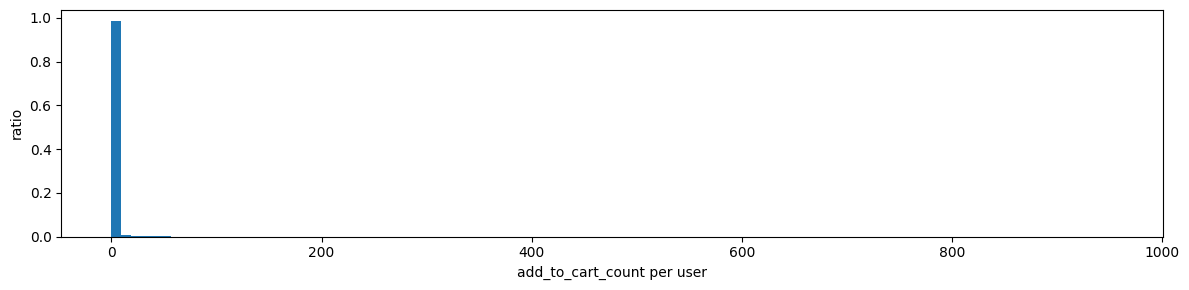

In [ ]:
# here is the block to see data distributions
# let's start with the problematic cart data

# this is a simple histogram
plt.hist(df.add_to_cart_count, bins=100, weights=np.ones(df.add_to_cart_count.shape[0])/df.add_to_cart_count.shape[0])
plt.xlabel("add_to_cart_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.show()

# the tails is too long and a style is not so pretty, let's fix that and remove pusers with no cart activity from the plot

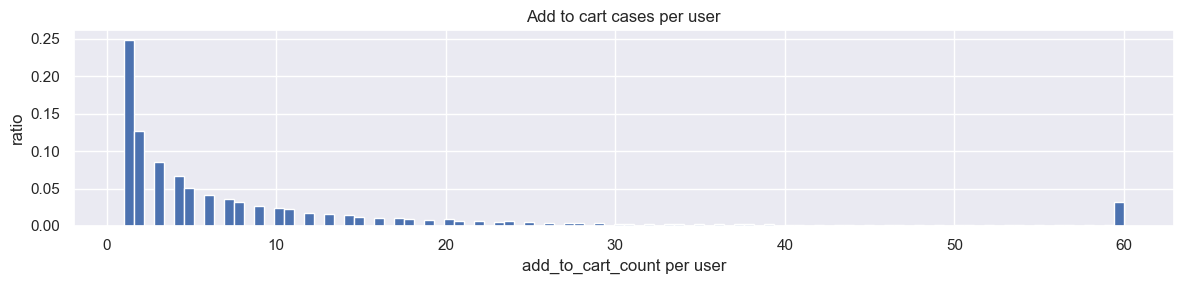

In [ ]:
sns.set_theme(style="darkgrid")
upper_clip = 60
plt.hist(df_carts.add_to_cart_count.clip(upper=upper_clip), bins=100, weights=np.ones(df_carts.add_to_cart_count.shape[0])/df_carts.add_to_cart_count.shape[0])
plt.xlabel("add_to_cart_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Add to cart cases per user")
plt.show()

### here I would consider removing users who does nore than 50 add to carts

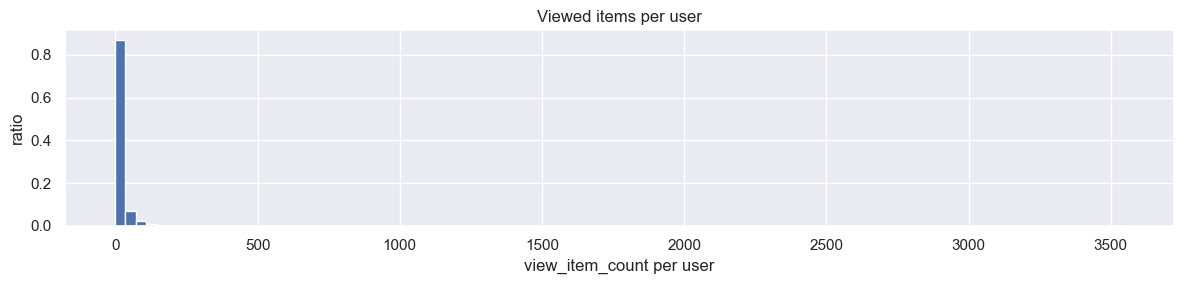

In [ ]:
# let's check the other data

# this is a simple histogram
plt.hist(df.view_item_count, bins=100, weights=np.ones(df.view_item_count.shape[0])/df.view_item_count.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

# the tails is too long and a style is not so pretty, let's fix that

### The difference while using the `weights` parameter

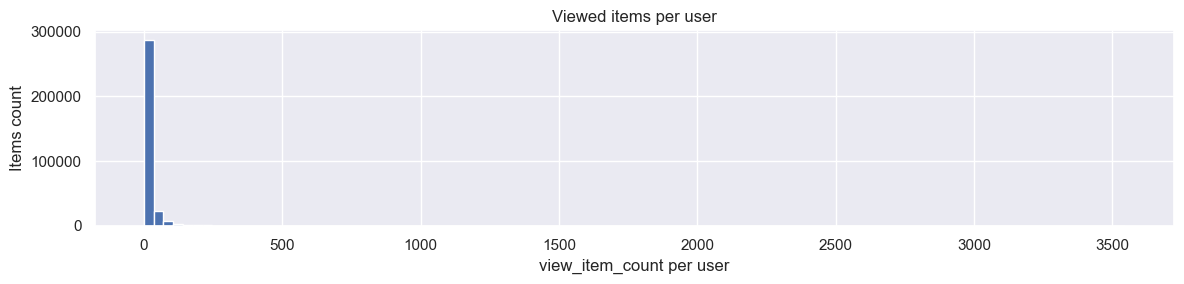

In [ ]:
# here is the histogram without weights. Keep attention to the Y-axis
plt.hist(df.view_item_count, bins=100)
plt.xlabel("view_item_count per user")
plt.ylabel("Items count") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

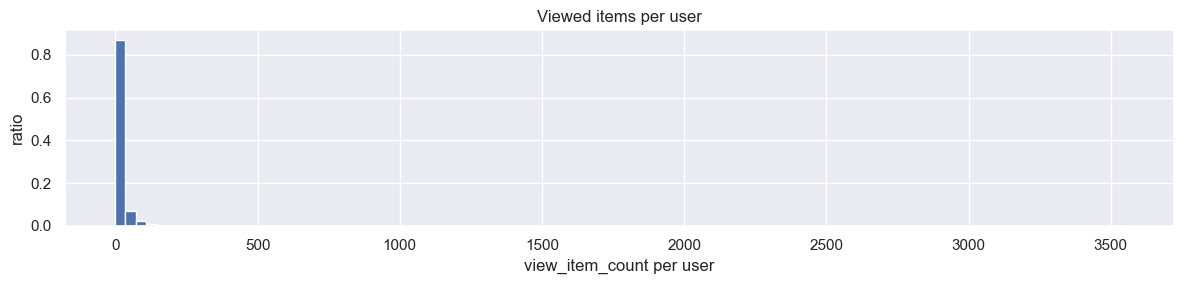

In [ ]:
# Now we build the same data, but with weights -- each number will be counted against the overal number as its ratio
# if we make a SUM of the weights = it will be exacly 1. So by watching at the plot with weights we see, that number of items viewed close to zero are more than 0.8 of cases (or more than 80% of cases)
plt.hist(df.view_item_count, bins=100, weights=np.ones(df.view_item_count.shape[0])/df.view_item_count.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

In [ ]:
df.view_item_count

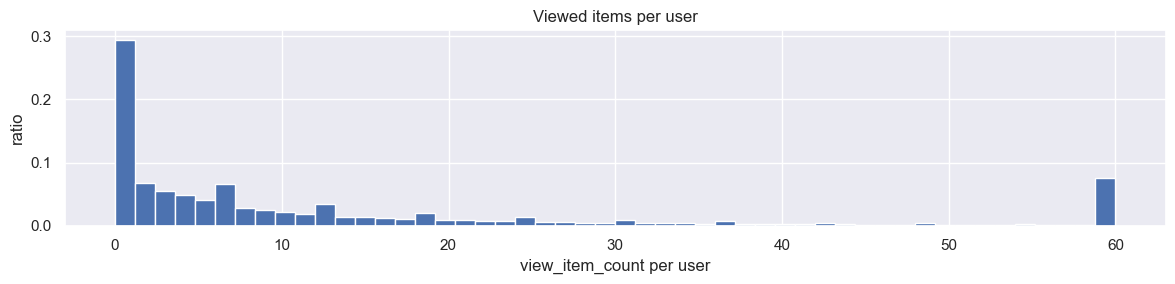

In [ ]:
# Let's use clipper to take closer look into the numbers around zero
# weights let us see not the numbers, but % of cases with specific value
plt.hist(df.view_item_count.clip(upper=60), bins=50, weights=np.ones(df.view_item_count.shape[0])/df.view_item_count.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.show()

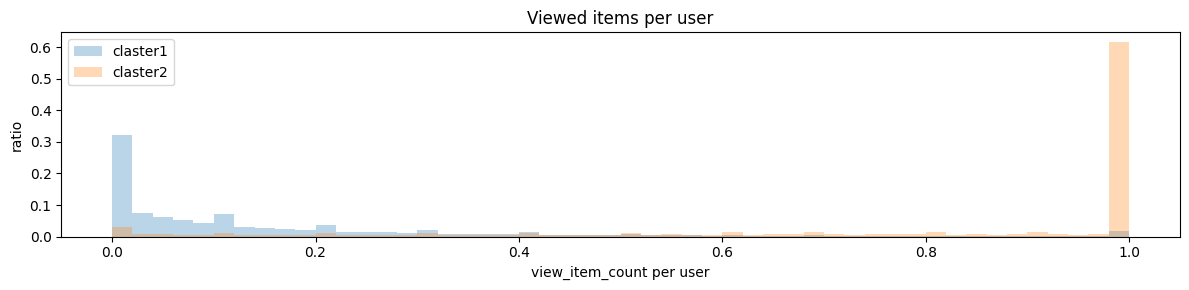

In [ ]:
# Let's use clipper to take closer look into the numbers around zero
# weights let us see not the numbers, but % of cases with specific value

# EXAMPLE TO COMPARE CLUSTERS

item_cluster1 = df_new[df_new["cluster"] == 0].view_item_count_per_day
item_cluster2 = df_new[df_new["cluster"] == 1].view_item_count_per_day
_, bin, _ = plt.hist(item_cluster1.clip(upper=1), bins=50, alpha=0.3,  label="claster1", weights=np.ones(item_cluster1.shape[0])/item_cluster1.shape[0])
plt.hist(item_cluster2.clip(upper=1), bins=bin, alpha=0.3, label="claster2", weights=np.ones(item_cluster2.shape[0])/item_cluster2.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.legend()
plt.show()

In [ ]:
item_cluster1.describe()

count    298412.000000
mean          0.163153
std           0.245150
min           0.000000
25%           0.016667
50%           0.066667
75%           0.216667
max           3.650000
Name: view_item_count_per_day, dtype: float64

In [ ]:
item_cluster2.describe()

count    31525.000000
mean         2.072349
std          2.782566
min          0.000000
25%          0.650000
50%          1.300000
75%          2.433333
max         59.083333
Name: view_item_count_per_day, dtype: float64

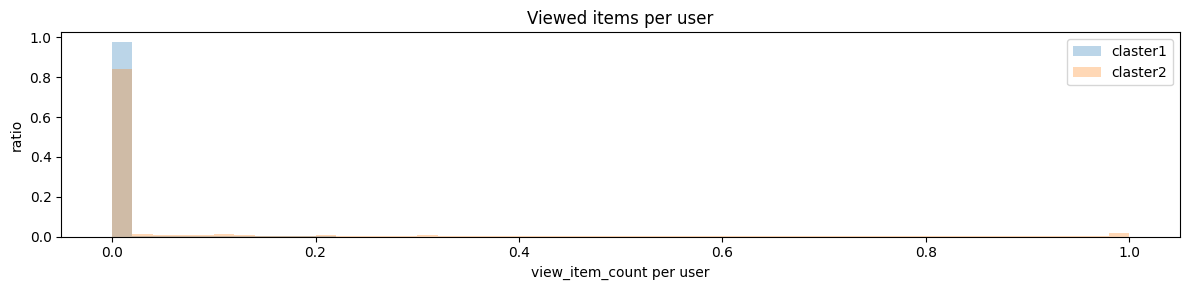

In [ ]:
df_new.columns

Index(['user_pseudo_id', 'enquiry_submit_count', 'agent_phone_count',
       'add_to_cart_count', 'view_item_count', 'listing_engagement_count',
       'engagement_weekdays', 'engagement_weekends', 'days_active'],
      dtype='object')

### When you finish studying the data and preparing the features
you can firstly try and run AutoML in VertexAI to see if it is working well<br>
with our data.<br>
Luis can help with it<br>

If we understand, that the numbers are good and we can interpret clusters with real meaning -- we are good to go
If it is difficult to make a meaning out of clusters -- have to run another model try, with other features/variables set, other model parameters. Try to use what you have got from the cluster analysis on what other steps should be done on data.


Question3)

After running AutoML in VertexAI, if it is not working well, and could we run embeddings & K-means clustering?<br>
`you have to:`<br>
- `visualize the results`
- `add cluster info to the whole data and see the distributions for each cluster -- does it make any sense?`

In [ ]:
To run K-means either manualy or in AutoMl we have to prepare the data first.
Some of the features will have correlation

In [ ]:
df_new.head(3)

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0  1132762844.1683777223             86.333333           4.666667   
1  1537784667.1656573431              3.362069           3.310345   
2  1776011315.1676056353             90.500000           0.000000   

   add_to_cart_count  view_item_count  listing_engagement_count  \
0                0.0         0.000000                  0.000000   
1                0.0        14.310345                 13.896552   
2                0.0         1.000000                  0.000000   

   engagement_weekdays  engagement_weekends  days_active  
0             0.666667             0.333333            3  
1             0.724138             0.275862           58  
2             0.500000             0.500000            2

In [ ]:
df_new["weekend_ratio"] = df_new["engagement_weekends"]/df_new["engagement_weekdays"]
df_new

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223             86.333333           4.666667   
1       1537784667.1656573431              3.362069           3.310345   
2       1776011315.1676056353             90.500000           0.000000   
3       1818135141.1628399971              1.557692           1.288462   
4       1867856195.1673210502              5.521739           0.260870   
...                       ...                   ...                ...   
329932   596225549.1684702634              0.000000           0.000000   
329933   571903515.1626167050              0.000000           0.166667   
329934   925742109.1682073332              0.000000           0.111111   
329935   947966557.1688685007              0.000000           0.250000   
329936  1828041751.1599371573              0.000000           0.100000   

        add_to_cart_count  view_item_count  listing_engagement_count  \
0                0.000000         0.000000                  0.000000   
1                0.000000        14.310345                 13.896552   
2                0.000000         1.000000                  0.000000   
3                0.000000        11.807692                 22.038462   
4                0.043478         6.608696                  3.304348   
...                   ...              ...                       ...   
329932           0.000000        14.500000                180.000000   
329933           0.000000         4.833333                 72.000000   
329934           0.000000         3.222222                 97.333333   
329935           0.000000         7.250000                 79.750000   
329936           0.000000         2.900000                 46.500000   

        engagement_weekdays  engagement_weekends  days_active  weekend_ratio  
0                  0.666667             0.333333            3       0.500000  
1                  0.724138             0.275862           58       0.380952  
2                  0.500000             0.500000            2       1.000000  
3                  0.682692             0.317308          104       0.464789  
4                  0.913043             0.086957           23       0.095238  
...                     ...                  ...          ...            ...  
329932             0.500000             0.500000            2       1.000000  
329933             0.500000             0.500000            6       1.000000  
329934             0.777778             0.222222            9       0.285714  
329935             0.500000             0.500000            4       1.000000  
329936             0.900000             0.100000           10       0.111111  

[329937 rows x 10 columns]

In [ ]:
df_variables = df_new.drop(columns=["user_pseudo_id", "engagement_weekdays", "engagement_weekends"])
# we remove user_pseudo_id because it is not the variable depending from anything

In [ ]:
correlation_matrix = df_variables.corr()
correlation_matrix

enquiry_submit_count  agent_phone_count  \
enquiry_submit_count                  1.000000           0.002340   
agent_phone_count                     0.002340           1.000000   
add_to_cart_count                     0.036768           0.004891   
view_item_count                       0.031711           0.034940   
listing_engagement_count              0.030251           0.005539   
days_active                           0.004246           0.002073   
weekend_ratio                        -0.005811           0.002632   

                          add_to_cart_count  view_item_count  \
enquiry_submit_count               0.036768         0.031711   
agent_phone_count                  0.004891         0.034940   
add_to_cart_count                  1.000000         0.125016   
view_item_count                    0.125016         1.000000   
listing_engagement_count           0.172714         0.532669   
days_active                        0.038914         0.069782   
weekend_ratio                     -0.017656         0.007287   

                          listing_engagement_count  days_active  weekend_ratio  
enquiry_submit_count                      0.030251     0.004246      -0.005811  
agent_phone_count                         0.005539     0.002073       0.002632  
add_to_cart_count                         0.172714     0.038914      -0.017656  
view_item_count                           0.532669     0.069782       0.007287  
listing_engagement_count                  1.000000     0.092746      -0.025243  
days_active                               0.092746     1.000000      -0.276001  
weekend_ratio                            -0.025243    -0.276001       1.000000

In [ ]:
# df["add_to_cart_per_day"] = df["add_to_cart_count"]/60
# df["view_item_per_day"] = df["view_item_count"]/60
# df["enquiry_submit_per_day"] = df["enquiry_submit_count"]/60
# df["agent_phone_per_day"] = df["agent_phone_count"]/60
# # df = df.drop(columns=["add_to_cart_count", "view_item_count", "listing_engagement_count"])

# df.head(3)

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0  1132762844.1683777223                   259                 14   
1  1537784667.1656573431                   195                192   
2  1776011315.1676056353                   181                  0   

   add_to_cart_count  view_item_count  listing_engagement_count  \
0                  0                0                         0   
1                  0              830                       806   
2                  0                2                         0   

   engagement_weekdays  engagement_weekends  add_to_cart_per_day  \
0                    2                    1                  0.0   
1                   42                   16                  0.0   
2                    1                    1                  0.0   

   view_item_per_day  enquiry_submit_per_day  agent_phone_per_day  
0           0.000000                4.316667             0.233333  
1          13.833333                3.250000             3.200000  
2           0.033333                3.016667             0.000000

In [ ]:
# df_feat = df[['add_to_cart_per_day', 'view_item_per_day',
#               'enquiry_submit_per_day', 'agent_phone_per_day']]
# df_feat["weekend_ratio"] = df["engagement_weekends"]/df["engagement_weekdays"]

<ipython-input-19-61b0030baa27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat["weekend_ratio"] = df["engagement_weekends"]/df["engagement_weekdays"]


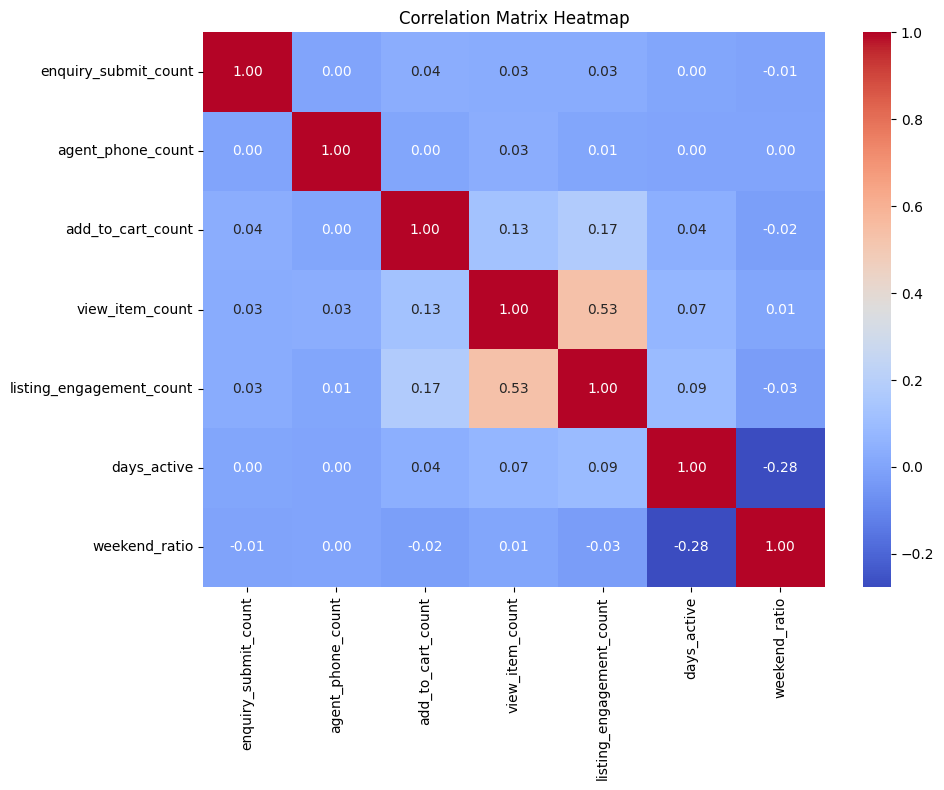

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
from the matrix we can see, that there are correlation between listing_engagement_count and engagement_weekdays, listing_engagement_count and engagement_weekends
So we can prbably remove listing_engagement_count

In [ ]:
Before we would run Kmeans, let's standartize every numerical variable
In this case all of our variables are numerical, but not to forget that user_id must not be touched

In [ ]:
df_variables

enquiry_submit_count  agent_phone_count  add_to_cart_count  \
0                  86.333333           4.666667           0.000000   
1                   3.362069           3.310345           0.000000   
2                  90.500000           0.000000           0.000000   
3                   1.557692           1.288462           0.000000   
4                   5.521739           0.260870           0.043478   
...                      ...                ...                ...   
329932              0.000000           0.000000           0.000000   
329933              0.000000           0.166667           0.000000   
329934              0.000000           0.111111           0.000000   
329935              0.000000           0.250000           0.000000   
329936              0.000000           0.100000           0.000000   

        view_item_count  listing_engagement_count  days_active  weekend_ratio  
0              0.000000                  0.000000            3       0.500000  
1             14.310345                 13.896552           58       0.380952  
2              1.000000                  0.000000            2       1.000000  
3             11.807692                 22.038462          104       0.464789  
4              6.608696                  3.304348           23       0.095238  
...                 ...                       ...          ...            ...  
329932        14.500000                180.000000            2       1.000000  
329933         4.833333                 72.000000            6       1.000000  
329934         3.222222                 97.333333            9       0.285714  
329935         7.250000                 79.750000            4       1.000000  
329936         2.900000                 46.500000           10       0.111111  

[329937 rows x 7 columns]

In [ ]:

X_num = df_variables

In [ ]:
from sklearn.preprocessing import StandardScaler

if "scaler" in locals():
    del scaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
# Assuming your data is stored in a DataFrame called 'data'
X_num_normed = scaler.fit_transform(X_num)
X_num_normed

array([[ 3.54639407e+02,  8.22230279e-01, -1.08669599e-01, ...,
        -6.94360705e-01, -3.47479375e-01, -5.19093704e-01],
       [ 1.37613251e+01,  5.68366538e-01, -1.08669599e-01, ...,
        -4.50956326e-01,  4.22969108e+00, -7.26836383e-01],
       [ 3.71757687e+02, -5.12331002e-02, -1.08669599e-01, ...,
        -6.94360705e-01, -4.30700655e-01,  3.53425547e-01],
       ...,
       [-5.13560911e-02, -3.04363531e-02, -1.08669599e-01, ...,
         1.01047658e+00,  1.51848311e-01, -8.93030526e-01],
       [-5.13560911e-02, -4.44041920e-03, -1.08669599e-01, ...,
         7.02496555e-01, -2.64258094e-01,  3.53425547e-01],
       [-5.13560911e-02, -3.25160278e-02, -1.08669599e-01, ...,
         1.20107791e-01,  2.35069592e-01, -1.19771979e+00]])

In [ ]:
X_num_normed

array([[ 3.54639407e+02,  8.22230279e-01, -1.08669599e-01, ...,
        -6.94360705e-01, -3.47479375e-01, -5.19093704e-01],
       [ 1.37613251e+01,  5.68366538e-01, -1.08669599e-01, ...,
        -4.50956326e-01,  4.22969108e+00, -7.26836383e-01],
       [ 3.71757687e+02, -5.12331002e-02, -1.08669599e-01, ...,
        -6.94360705e-01, -4.30700655e-01,  3.53425547e-01],
       ...,
       [-5.13560911e-02, -3.04363531e-02, -1.08669599e-01, ...,
         1.01047658e+00,  1.51848311e-01, -8.93030526e-01],
       [-5.13560911e-02, -4.44041920e-03, -1.08669599e-01, ...,
         7.02496555e-01, -2.64258094e-01,  3.53425547e-01],
       [-5.13560911e-02, -3.25160278e-02, -1.08669599e-01, ...,
         1.20107791e-01,  2.35069592e-01, -1.19771979e+00]])

In [ ]:
data = pd.DataFrame(X_num_normed)
data.columns = df_variables.columns
data.to_parquet("data.pq")

<ipython-input-20-cdbbef07e46b>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=F_2D[:, 0], y=F_2D[:, 1], palette="Set1")


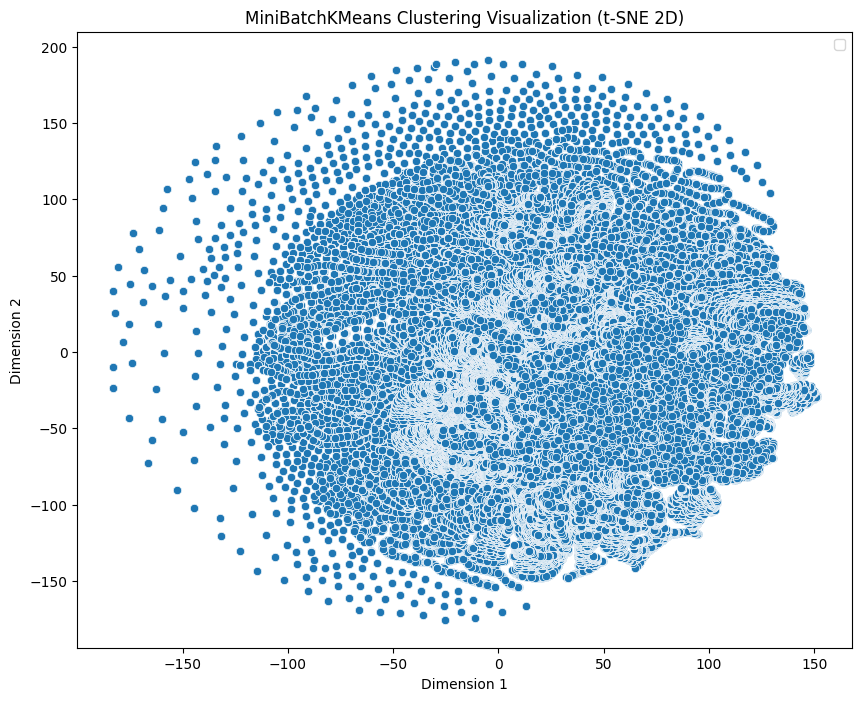

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE  # For dimensionality reduction, e.g., t-SNE

# Visualizing high-dimensional data in 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
F_2D = tsne.fit_transform(X_num_normed)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=F_2D[:, 0], y=F_2D[:, 1], palette="Set1")
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
if "mbk_new" in locals():
    del mbk_new

for n_clusters in range(2, 15):
    print(f"running {n_clusters} number of clusters")
    mbk_new = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=10, batch_size=512)
    cluster_labels = mbk_new.fit_predict(X_num_normed)
    # silhouette_avg = silhouette_score(F, cluster_labels)
    # print("For n_clusters = {}, the average silhouette score is {:.2f}".format(n_clusters, silhouette_avg))
    ch_score = calinski_harabasz_score(X_num_normed, cluster_labels)
    db_score = davies_bouldin_score(X_num_normed, cluster_labels)
    print("For n_clusters = {}, the average calinski_harabasz score is {:.2f}".format(n_clusters, ch_score))
    # the higher the better
    print("For n_clusters = {}, the average davies_bouldin score is {:.2f}".format(n_clusters, db_score))
    # the lower the better

running 2 number of clusters
For n_clusters = 2, the average calinski_harabasz score is 39222.66
For n_clusters = 2, the average davies_bouldin score is 1.72
running 3 number of clusters
For n_clusters = 3, the average calinski_harabasz score is 39175.36
For n_clusters = 3, the average davies_bouldin score is 1.46
running 4 number of clusters
For n_clusters = 4, the average calinski_harabasz score is 46284.43
For n_clusters = 4, the average davies_bouldin score is 1.20
running 5 number of clusters
For n_clusters = 5, the average calinski_harabasz score is 42496.82
For n_clusters = 5, the average davies_bouldin score is 1.30
running 6 number of clusters
For n_clusters = 6, the average calinski_harabasz score is 43351.84
For n_clusters = 6, the average davies_bouldin score is 1.15
running 7 number of clusters
For n_clusters = 7, the average calinski_harabasz score is 43164.91
For n_clusters = 7, the average davies_bouldin score is 1.04
running 8 number of clusters
For n_clusters = 8, the

In [ ]:
if "mbk" in locals():
    del mbk

# sample_df = user_embeddings_full.sample(frac=0.5, random_state=1)
F = X_num_normed
F = StandardScaler().fit_transform(F)

n_clusters = 2
batch_size = 256

# random_state == seeding
mbk = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=10, batch_size=batch_size)
mbk.fit(F)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
mbk_means_labels = pairwise_distances_argmin(F, mbk_means_cluster_centers)
yhat_2 = mbk.predict(F)

# plt.figure(figsize=(12,8))
# plt.scatter(embedding[:, 0], embedding[:, 1], c=yhat_7)
# plt.title(f"Amount of clusters is {n_clusters}, batch size is {batch_size}")
# plt.colorbar()
# plt.show()

In [ ]:
yhat_2

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df.shape[0]

329937

In [ ]:
df.drop_duplicates().shape[0]

329937

In [ ]:
df_new = df.copy()
df_new["cluster"] = yhat_2
df_new

user_pseudo_id  enquiry_submit_count  agent_phone_count  \
0       1132762844.1683777223                   259                 14   
1       1537784667.1656573431                   195                192   
2       1776011315.1676056353                   181                  0   
3       1818135141.1628399971                   162                134   
4       1867856195.1673210502                   127                  6   
...                       ...                   ...                ...   
329932   596225549.1684702634                     0                  0   
329933   571903515.1626167050                     0                  1   
329934   925742109.1682073332                     0                  1   
329935   947966557.1688685007                     0                  1   
329936  1828041751.1599371573                     0                  1   

        engagement_weekdays  engagement_weekends  add_to_cart_per_day  \
0                         2                    1             0.000000   
1                        42                   16             0.000000   
2                         1                    1             0.000000   
3                        71                   33             0.000000   
4                        21                    2             0.016667   
...                     ...                  ...                  ...   
329932                    1                    1             0.000000   
329933                    3                    3             0.000000   
329934                    7                    2             0.000000   
329935                    2                    2             0.000000   
329936                    9                    1             0.000000   

        view_item_count_per_day  cluster  
0                      0.000000        1  
1                     13.833333        1  
2                      0.033333        1  
3                     20.466667        1  
4                      2.533333        1  
...                         ...      ...  
329932                 0.483333        0  
329933                 0.483333        0  
329934                 0.483333        0  
329935                 0.483333        0  
329936                 0.483333        0  

[329937 rows x 8 columns]

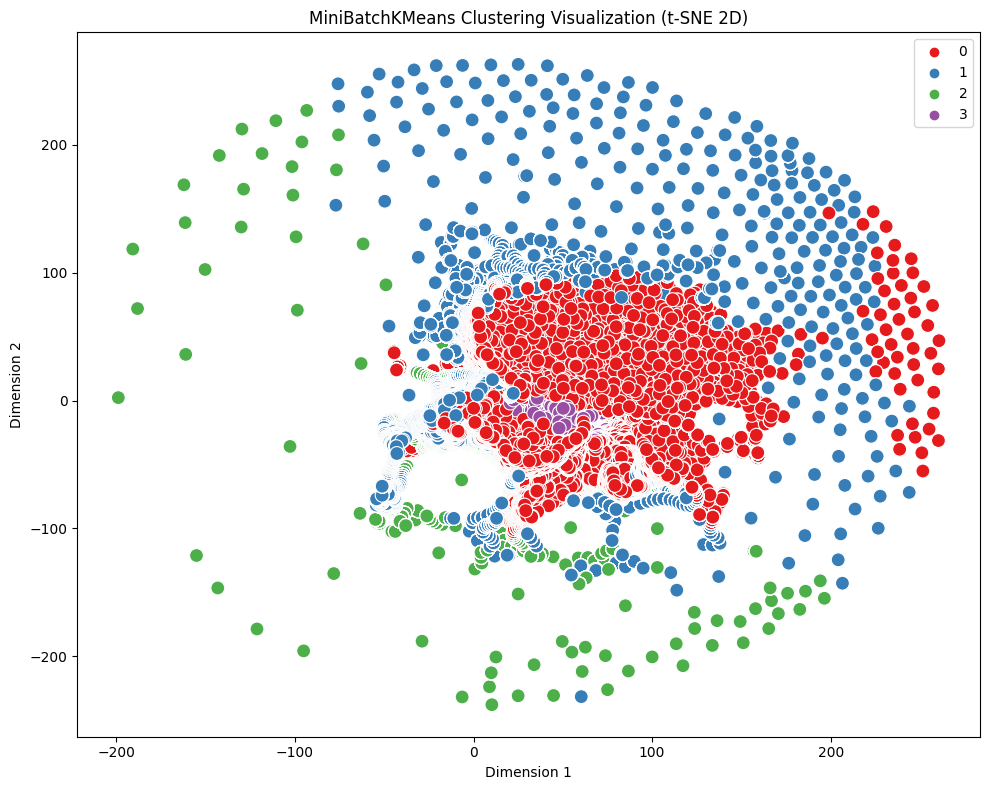

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE  # For dimensionality reduction, e.g., t-SNE

# # Visualizing high-dimensional data in 2D using t-SNE
# tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
# F_2D = tsne.fit_transform(F)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=F_2D[:, 0], y=F_2D[:, 1], hue=yhat_2, palette="Set1", s=100)
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


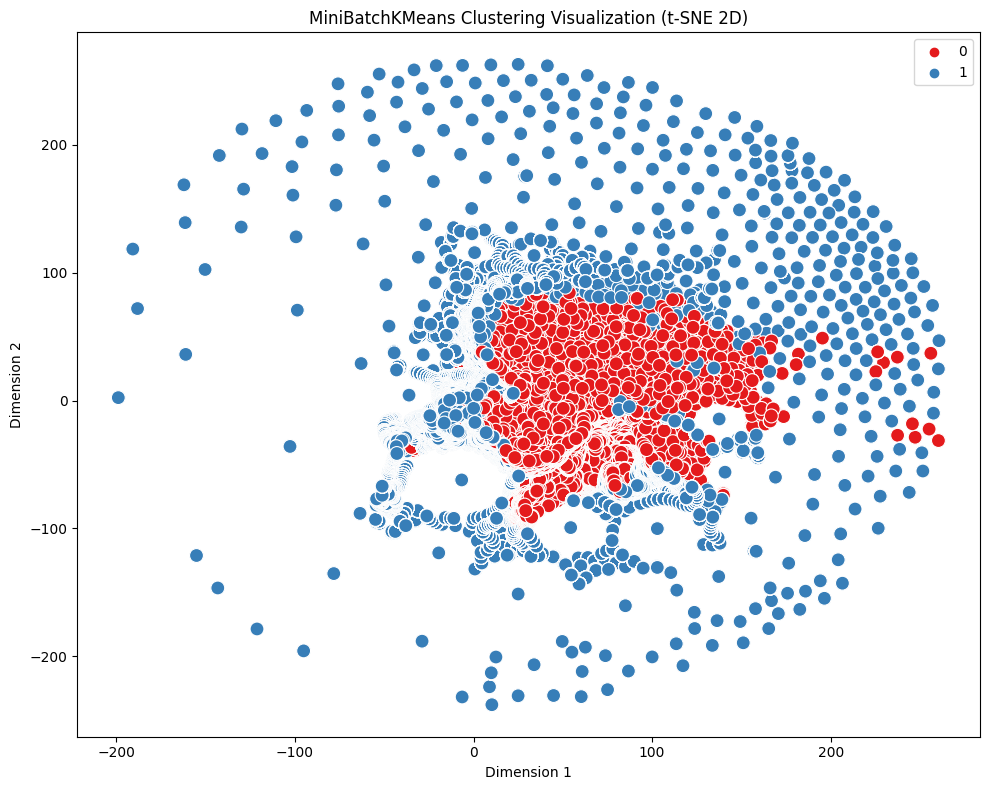

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE  # For dimensionality reduction, e.g., t-SNE

# Visualizing high-dimensional data in 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
F_2D = tsne.fit_transform(F)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=F_2D[:, 0], y=F_2D[:, 1], hue=yhat_2, palette="Set1", s=100)
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


In [ ]:
# import umap.umap_ as umap
# import warnings

# # Suppress the UMAP spectral initialization warning
# warnings.filterwarnings('ignore', category=UserWarning, module='umap.umap_')

# if "umap_minikmeans" in locals():
#     del umap_minikmeans

# umap_minikmeans = umap.UMAP(n_components=2, random_state=1, metric="manhattan", n_neighbors=10)
# embedding = umap_minikmeans.fit_transform(F)

# plt.figure(figsize=(15, 10))
# plt.scatter(embedding[:, 0], embedding[:, 1], c=yhat_2)
# plt.colorbar()

In [ ]:
# Let's use clipper to take closer look into the numbers around zero
# weights let us see not the numbers, but % of cases with specific value

# EXAMPLE TO COMPARE CLUSTERS

item_cluster1 = df_new[df_new["cluster"] == 0].add_to_cart_per_day
item_cluster2 = df_new[df_new["cluster"] == 1].add_to_cart_per_day
_, bin, _ = plt.hist(item_cluster1.clip(upper=1), bins=50, alpha=0.3,  label="claster1", weights=np.ones(item_cluster1.shape[0])/item_cluster1.shape[0])
plt.hist(item_cluster2.clip(upper=1), bins=bin, alpha=0.3, label="claster2", weights=np.ones(item_cluster2.shape[0])/item_cluster2.shape[0])
plt.xlabel("view_item_count per user")
plt.ylabel("ratio") # y is ratio, because in plt.hist I have calculated the weight as ratio
plt.title("Viewed items per user")
plt.legend()
plt.show()

### Statistical difference
Let's compare if the difference between clusters is statistically significant.<br>
To do so we need to take a test, according to the distribution shape.<br>
In most of the cases we won't have normally distributed variables, so we can use Kolmogorov-Smirnov statistics to compare the distributions

In [ ]:
from scipy import stats

# Assuming 'sample1' and 'sample2' are your two independent sample arrays
# if you have weights, you need to use weighted KS
ks_stat, p_value = stats.ks_2samp(sample1, sample2)


### Embeddings

Sometimes, if we can't deal with variables correctly, we can try to find latent pattern

In [ ]:
# Libraries to run embeddings

import pandas as pd
import numpy as np
from lightfm import LightFM
# import umap.umap_ as umap
import matplotlib.pyplot as plt
import scipy.sparse as ss

In [ ]:
df_variables

enquiry_submit_count  agent_phone_count  add_to_cart_count  \
0                  86.333333           4.666667           0.000000   
1                   3.362069           3.310345           0.000000   
2                  90.500000           0.000000           0.000000   
3                   1.557692           1.288462           0.000000   
4                   5.521739           0.260870           0.043478   
...                      ...                ...                ...   
329932              0.000000           0.000000           0.000000   
329933              0.000000           0.166667           0.000000   
329934              0.000000           0.111111           0.000000   
329935              0.000000           0.250000           0.000000   
329936              0.000000           0.100000           0.000000   

        view_item_count  listing_engagement_count  days_active  weekend_ratio  
0              0.000000                  0.000000            3       0.500000  
1             14.310345                 13.896552           58       0.380952  
2              1.000000                  0.000000            2       1.000000  
3             11.807692                 22.038462          104       0.464789  
4              6.608696                  3.304348           23       0.095238  
...                 ...                       ...          ...            ...  
329932        14.500000                180.000000            2       1.000000  
329933         4.833333                 72.000000            6       1.000000  
329934         3.222222                 97.333333            9       0.285714  
329935         7.250000                 79.750000            4       1.000000  
329936         2.900000                 46.500000           10       0.111111  

[329937 rows x 7 columns]

#### Preparing to run the model for embeddings

In [ ]:
# # before we will construct the matrix and run the model,
# # we need to prepare data finally

# # It has to be in the for of matrix with users as rows and all the variables as columns

# # to do so we would require some additional code

# # 1) pivoting

# events_pages = pivot_events.merge(pivot_pages, on="client_id", how="outer")\
#     .reset_index(drop=True)\
#     .fillna(0)


# # 2) dividing categorical variables and numerical variables
# # user is booking user, it won't partisipate further in embeddings

# X_num_df = users_clean.drop(columns=["user"]).select_dtypes(exclude='object')
# X_cat_df = users_clean.drop(columns=["user", "numeric_column"]).select_dtypes(include='object')

# # 3) converting categorial variables into the numerical ones
# categorical = pd.get_dummies(X_cat_df).values
# del X_cat_df

# categorical.replace(np.nan, -1, inplace=True)


# # 2-3 combined) If we are going to run the embeddings on ones
# num_and_cat = pd.get_dummies(users_clean.copy())
# del X_full_df
# num_and_cat.replace(np.nan, -1, inplace=True)

In [ ]:
# emb
X_dumm = pd.get_dummies(df_variables.copy())
X_dumm.replace(np.nan, -1, inplace=True)

In [ ]:
X_dumm

enquiry_submit_count  agent_phone_count  add_to_cart_count  \
0                  86.333333           4.666667           0.000000   
1                   3.362069           3.310345           0.000000   
2                  90.500000           0.000000           0.000000   
3                   1.557692           1.288462           0.000000   
4                   5.521739           0.260870           0.043478   
...                      ...                ...                ...   
329932              0.000000           0.000000           0.000000   
329933              0.000000           0.166667           0.000000   
329934              0.000000           0.111111           0.000000   
329935              0.000000           0.250000           0.000000   
329936              0.000000           0.100000           0.000000   

        view_item_count  listing_engagement_count  days_active  weekend_ratio  
0              0.000000                  0.000000            3       0.500000  
1             14.310345                 13.896552           58       0.380952  
2              1.000000                  0.000000            2       1.000000  
3             11.807692                 22.038462          104       0.464789  
4              6.608696                  3.304348           23       0.095238  
...                 ...                       ...          ...            ...  
329932        14.500000                180.000000            2       1.000000  
329933         4.833333                 72.000000            6       1.000000  
329934         3.222222                 97.333333            9       0.285714  
329935         7.250000                 79.750000            4       1.000000  
329936         2.900000                 46.500000           10       0.111111  

[329937 rows x 7 columns]

In [ ]:
for col in X_dumm.columns:
  X_dumm.loc[X_dumm[col] != 0, col] = 1

# Display the updated DataFrame
print(X_dumm)


        enquiry_submit_count  agent_phone_count  add_to_cart_count  \
0                        1.0                1.0                0.0   
1                        1.0                1.0                0.0   
2                        1.0                0.0                0.0   
3                        1.0                1.0                0.0   
4                        1.0                1.0                1.0   
...                      ...                ...                ...   
329932                   0.0                0.0                0.0   
329933                   0.0                1.0                0.0   
329934                   0.0                1.0                0.0   
329935                   0.0                1.0                0.0   
329936                   0.0                1.0                0.0   

        view_item_count  listing_engagement_count  days_active  weekend_ratio  
0                   0.0                       0.0            1            1.0  

In [ ]:
# to run LightFM efectively (high speed), we need to prepare sparse matrix
# scipy.sparse module has ss to run matrix
# label is the column of USER ID, we need to remove it from matrics or otherwise wo will get DATA LEAK

sparse_data = ss.csr_matrix(X_num_normed)
#lets' check the matrix
sparse_data

<329937x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2309559 stored elements in Compressed Sparse Row format>

#### Let's run embeddings model

In [ ]:
# before we do that, considering the fact we will be running it several times,
# we have to check if the model exists. If it exists, we have to delete it

if "model" in locals():
    del model

# if we re-run the model without deletion we will receive the result for the OLD model
# when tuning it further, we will be changing the n_com parameter
# ALWAYS SEED THE MODEL to repeat the results
# random state is SEED

n_comp = 5
model = LightFM(loss='warp', random_state=42, no_components=n_comp)
model.fit(sparse_data, epochs=40, num_threads=1)

# let's collect user_embeddings
user_emb = model.user_embeddings


### Visualization
before we will run clustering, let's see how does embeddings look like

this is an awful result:)<br>
we have to go deeper and try some other options

<ipython-input-32-1a9e814d2dd1>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")


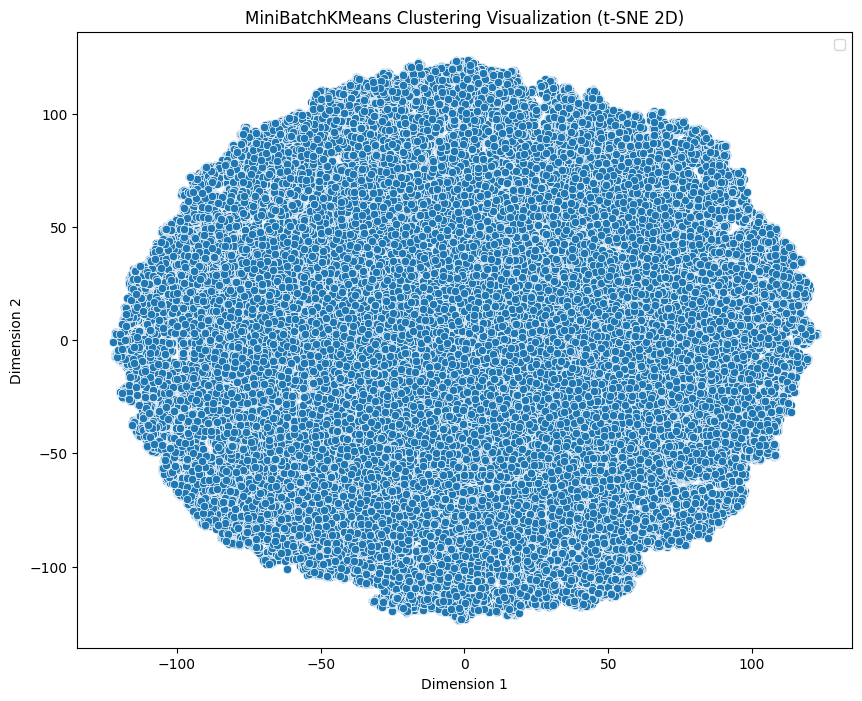

In [ ]:
# Visualizing high-dimensional data in 2D using t-SNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
if "tsne" in locals():
    del tsne
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
embeddings = tsne.fit_transform(user_emb)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [ ]:
sparse_data = ss.csr_matrix(X_dumm)
#lets' check the matrix
sparse_data

<329937x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1403591 stored elements in Compressed Sparse Row format>

In [ ]:
# before we do that, considering the fact we will be running it several times,
# we have to check if the model exists. If it exists, we have to delete it

if "model" in locals():
    del model

# if we re-run the model without deletion we will receive the result for the OLD model
# when tuning it further, we will be changing the n_com parameter
# ALWAYS SEED THE MODEL to repeat the results
# random state is SEED

n_comp = 3
model = LightFM(loss='warp', random_state=42, no_components=n_comp)
model.fit(sparse_data, epochs=40, num_threads=1)

# let's collect user_embeddings
user_emb = model.user_embeddings


In [ ]:

sparse_data = ss.csr_matrix(df_variables)
#lets' check the matrix
sparse_data

<329937x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1403591 stored elements in Compressed Sparse Row format>

In [ ]:
# before we do that, considering the fact we will be running it several times,
# we have to check if the model exists. If it exists, we have to delete it

if "model" in locals():
    del model

# if we re-run the model without deletion we will receive the result for the OLD model
# when tuning it further, we will be changing the n_com parameter
# ALWAYS SEED THE MODEL to repeat the results
# random state is SEED

n_comp = 5
model = LightFM(loss='warp', random_state=42, no_components=n_comp)
model.fit(sparse_data, epochs=40, num_threads=1)

# let's collect user_embeddings
user_emb = model.user_embeddings


<ipython-input-19-1a9e814d2dd1>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")


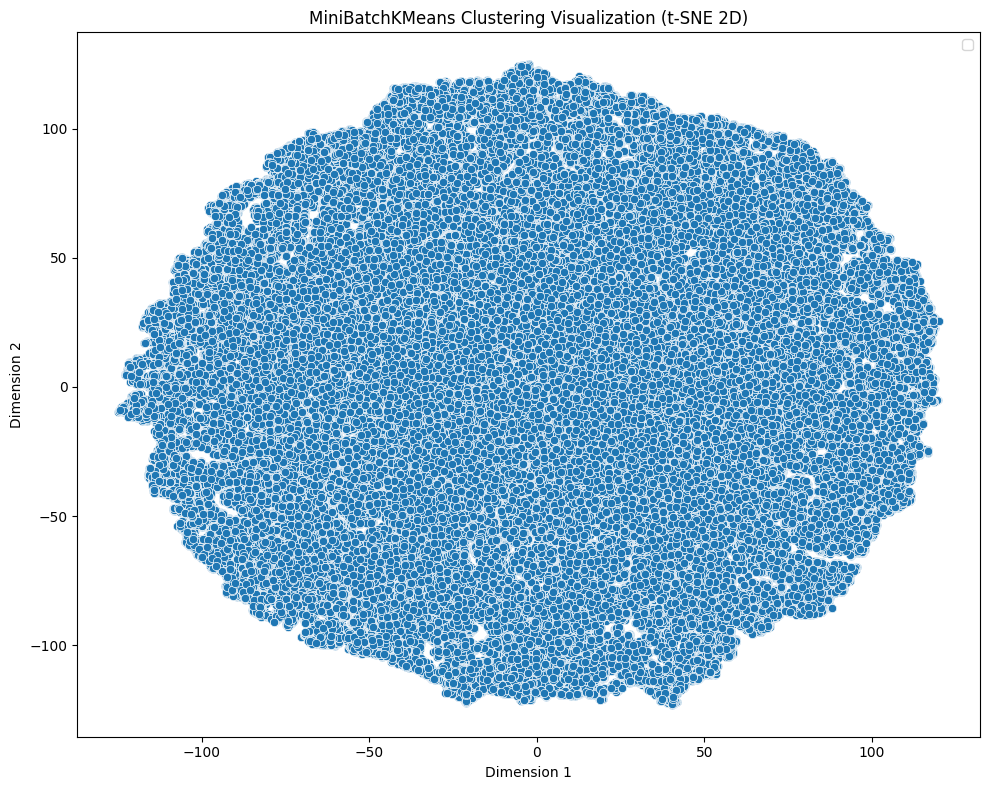

In [ ]:
# Visualizing high-dimensional data in 2D using t-SNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
if "tsne" in locals():
    del tsne
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
embeddings = tsne.fit_transform(user_emb)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

<ipython-input-39-1a9e814d2dd1>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")


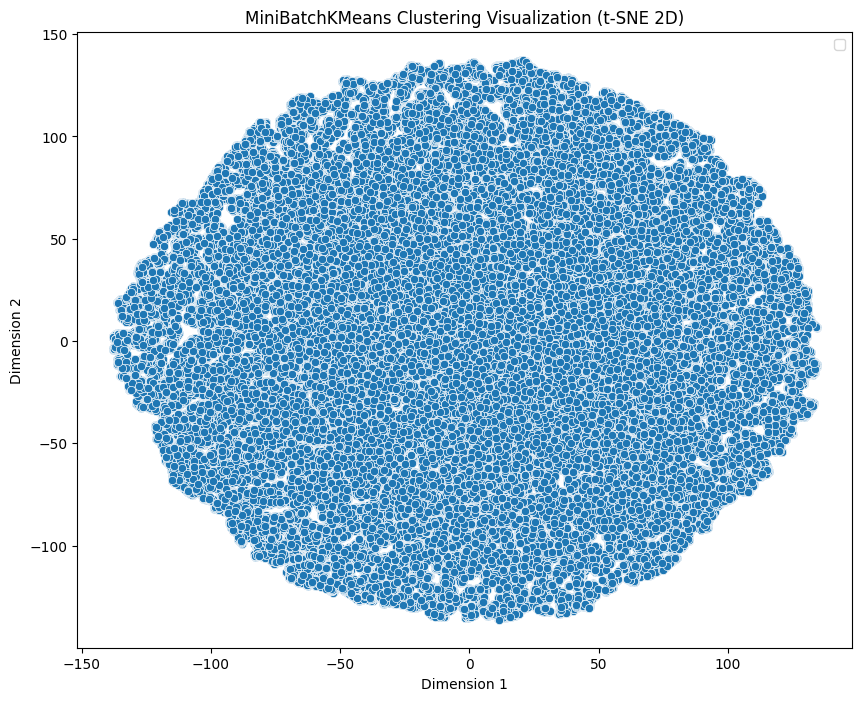

In [ ]:
# Visualizing high-dimensional data in 2D using t-SNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
if "tsne" in locals():
    del tsne
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
embeddings = tsne.fit_transform(user_emb)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

<ipython-input-13-b4aefa3ecdc3>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")


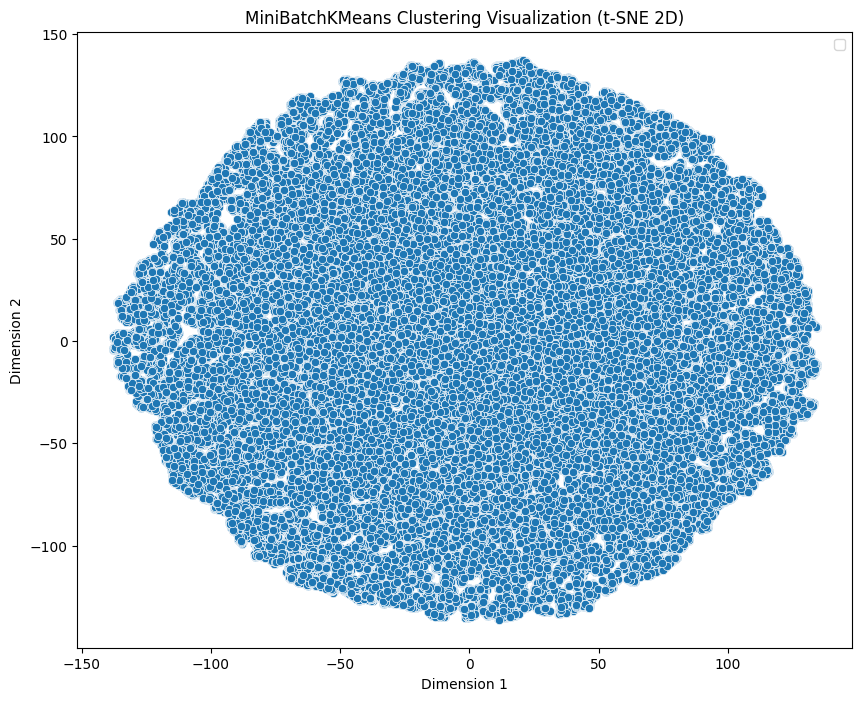

In [ ]:
# Visualizing high-dimensional data in 2D using t-SNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
if "tsne" in locals():
    del tsne
tsne = TSNE(n_components=2, perplexity=30, random_state=0)  # You can adjust perplexity as needed
embeddings = tsne.fit_transform(user_emb)

# Create a scatter plot of the MiniBatchKMeans clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], palette="Set1")
plt.title("MiniBatchKMeans Clustering Visualization (t-SNE 2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [ ]:
# automated way to find parameters for LightFM model, but require resources

if "model" in locals():
    del model

import optuna
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k

# Define a function that takes a trial object and returns a LightFM model with hyperparameters sampled from the trial.
def objective(trial):
    # Load the data
    # dataset = Dataset()
    # dataset.fit(users, items)
    # interactions, _ = dataset.build_interactions((u, i, r) for u, i, r in train)

    interactions = sparse_device

    # Sample hyperparameters from the trial
    num_components = trial.suggest_int('num_components', 10, 200, step=10)
    learning_rate = trial.suggest_uniform('learning_rate', 0.001, 0.1)
    loss = trial.suggest_categorical('loss', ['logistic', 'bpr', 'warp'])
    k = trial.suggest_int('k', 1, 10)
    n = trial.suggest_int('n', 1, 10)

    # Create the LightFM model
    model = LightFM(no_components=num_components, learning_rate=learning_rate, loss=loss)

    # Train the model and compute the validation RMSE
    train_data, test_data = random_train_test_split(interactions, test_percentage=0.2)
    model.fit(train_data, epochs=10, num_threads=4)
    test_precision = precision_at_k(model, test_data, k=k, num_threads=4).mean()
    test_recall = recall_at_k(model, test_data, k=k, num_threads=4).mean()
    validation_rmse = 1 - test_precision - test_recall

    return validation_rmse

# Define the search space and create the study object
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and validation RMSE
print('Best hyperparameters:', study.best_params)
print('Validation RMSE:', study.best_value)


### When we have decided on the parameters, let's check how it looks visually
#### Running visualization for embeddings

In [ ]:
import umap.umap_ as umap

In [ ]:
# to do so, we need to use UMAP
# It will give you a map to analyse

if "umap_model" in locals():
    del umap_model

# defining the UMAP model
umap_model = umap.UMAP(n_components=2, metric='manhattan', n_neighbors=30)

# fitting
embedding = umap_model.fit_transform(user_emb)

# plotting
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show()

In [ ]:
# if we find the image to be satisfactory, we can add it to a dataframe
# they have no miningful names, but we can add them to the whole original dataframe

emb_data = pd.DataFrame(user_emb)
for col in emb_data.columns:
    emb_data = emb_data.rename(columns={col: f"col_{col}"})

### Preparing the data to run K-means

##### to do so we need to go through several steps
##### data must be ready for the model

1) All numeric variables must be Normalized
2) We can't use any categorical (string) values if they are not numerically represented
3) There must be no correlation between variables
4) Embeddings are OK

In [ ]:
# normalization
# to remember: we always do normalization on TRAIN dataset only and apply it for test.
# here we have UNsupervised learning, so we don't have to do it, but is it is supervised -- it's a must

